<a href="https://colab.research.google.com/github/Lee-geonwu/class_ai4dl/blob/main/week5/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 784)

In [ ]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [ ]:
np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [ ]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.29255975, 0.04066072,
       0.72937639])

In [ ]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6064 - accuracy: 0.8126 - val_loss: 0.3103 - val_accuracy: 0.9017
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2488 - accuracy: 0.9243 - val_loss: 0.2279 - val_accuracy: 0.9283
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1668 - accuracy: 0.9492 - val_loss: 0.1395 - val_accuracy: 0.9596
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9620 - val_loss: 0.1371 - val_accuracy: 0.9592
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.9731 - val_loss: 0.1352 - val_accuracy: 0.9597
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.1370 - val_accuracy: 0.9613
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.1197 - val_accuracy: 0.9678
Epoch 

**Plotting a validation accuracy comparison**

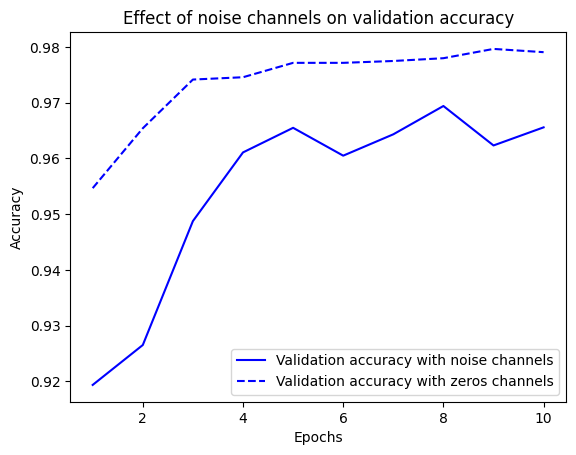

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 2.3153 - accuracy: 0.1024 - val_loss: 2.3038 - val_accuracy: 0.1051
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2998 - accuracy: 0.1126 - val_loss: 2.3077 - val_accuracy: 0.1047
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2919 - accuracy: 0.1265 - val_loss: 2.3145 - val_accuracy: 0.1032
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2807 - accuracy: 0.1372 - val_loss: 2.3226 - val_accuracy: 0.1078
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2652 - accuracy: 0.1510 - val_loss: 2.3296 - val_accuracy: 0.1075
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2464 - accuracy: 0.1655 - val_loss: 2.3414 - val_accuracy: 0.1089
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2240 - accuracy: 0.1791 - val_loss: 2.3581 - val_accuracy: 0.1067

In [ ]:
# - Some questions
# - From Training the same model on MNIST data with noise channels or all zero channels
#   Add validation accuracy of original data for mnist data.

In [ ]:
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

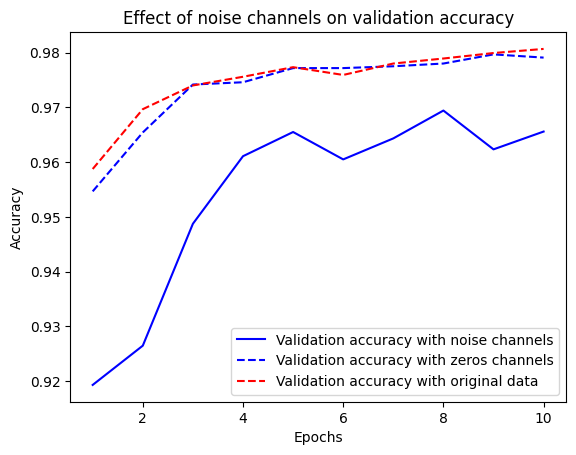

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

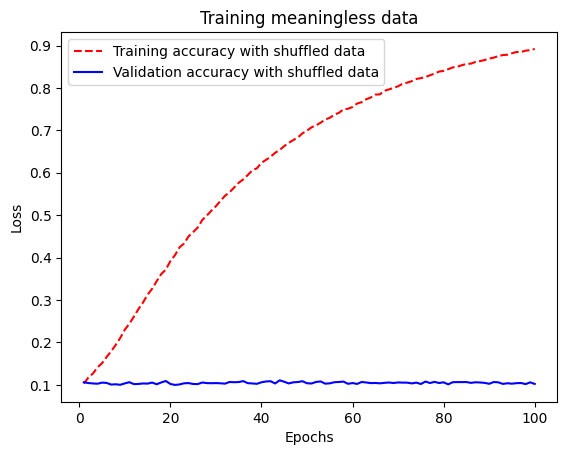

In [8]:
# - Fitting a MNIST model with randomly shuffled labels.
#   Visualize training accuracy and validation accuracy.
import matplotlib.pyplot as plt
train_accuracy = history.history["accuracy"]
vac_accuracy = history.history["val_accuracy"]
epochs = range(1, 101)
plt.plot(epochs, train_accuracy, "r--", label="Training accuracy with shuffled data")
plt.plot(epochs, vac_accuracy, "b-", label="Validation accuracy with shuffled data")
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 0.01
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 661.9036 - accuracy: 0.2759 - val_loss: 2.2923 - val_accuracy: 0.2024
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5809 - accuracy: 0.1787 - val_loss: 3.2789 - val_accuracy: 0.1797
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4686 - accuracy: 0.1543 - val_loss: 2.4289 - val_accuracy: 0.1382
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4698 - accuracy: 0.1436 - val_loss: 2.3043 - val_accuracy: 0.1484
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4274 - accuracy: 0.1411 - val_loss: 2.3535 - val_accuracy: 0.1456
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3575 - accuracy: 0.1455 - val_loss: 2.3515 - val_accuracy: 0.1363
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4097 - accuracy: 0.1467 - val_loss: 2.3628 - val_accuracy: 0.1436
Epoc

**The same model with a more appropriate learning rate**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3636 - accuracy: 0.9111 - val_loss: 0.1332 - val_accuracy: 0.9592
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1267 - accuracy: 0.9639 - val_loss: 0.1410 - val_accuracy: 0.9664
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0970 - accuracy: 0.9738 - val_loss: 0.1644 - val_accuracy: 0.9618
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9794 - val_loss: 0.1664 - val_accuracy: 0.9678
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9818 - val_loss: 0.2283 - val_accuracy: 0.9634
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9849 - val_loss: 0.1704 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9876 - val_loss: 0.2096 - val_accuracy: 0.9706
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6708 - accuracy: 0.8345 - val_loss: 0.3602 - val_accuracy: 0.9052
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3542 - accuracy: 0.9020 - val_loss: 0.3106 - val_accuracy: 0.9145
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3189 - accuracy: 0.9112 - val_loss: 0.2949 - val_accuracy: 0.9184
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.9164 - val_loss: 0.2847 - val_accuracy: 0.9208
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.9182 - val_loss: 0.2782 - val_accuracy: 0.9226
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.9200 - val_loss: 0.2751 - val_accuracy: 0.9248
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9217 - val_loss: 0.2723 - val_accuracy: 0.9252
Epoch 

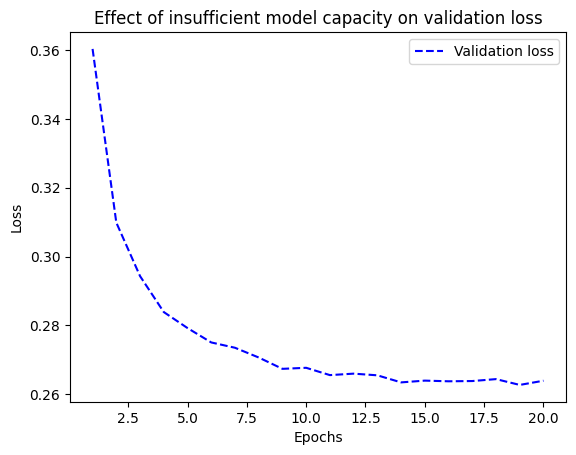

In [12]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3674 - accuracy: 0.8955 - val_loss: 0.2075 - val_accuracy: 0.9386
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1643 - accuracy: 0.9507 - val_loss: 0.1500 - val_accuracy: 0.9550
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1175 - accuracy: 0.9647 - val_loss: 0.1292 - val_accuracy: 0.9634
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0908 - accuracy: 0.9729 - val_loss: 0.1243 - val_accuracy: 0.9638
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.1000 - val_accuracy: 0.9710
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9815 - val_loss: 0.1019 - val_accuracy: 0.9701
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0977 - val_accuracy: 0.9726
Epoch 

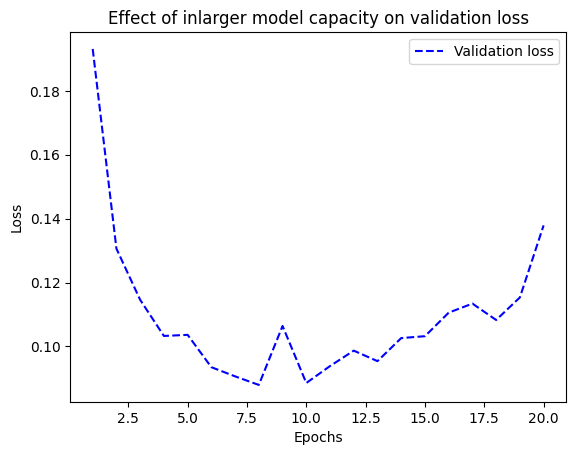

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of inlarger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5397 - accuracy: 0.7681 - val_loss: 0.4152 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3321 - accuracy: 0.8905 - val_loss: 0.3132 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2459 - accuracy: 0.9165 - val_loss: 0.2972 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2000 - accuracy: 0.9325 - val_loss: 0.2749 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1672 - accuracy: 0.9427 - val_loss: 0.2902 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1401 - accuracy: 0.9553 - val_loss: 0.3259 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1224 - accuracy: 0.9617 - val_loss: 0.3095 - val_accuracy: 0.8807
Epoch 8/20
30

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6682 - accuracy: 0.6461 - val_loss: 0.6382 - val_accuracy: 0.7126
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6117 - accuracy: 0.7405 - val_loss: 0.5947 - val_accuracy: 0.7443
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5671 - accuracy: 0.7911 - val_loss: 0.5607 - val_accuracy: 0.8155
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5304 - accuracy: 0.8277 - val_loss: 0.5355 - val_accuracy: 0.7822
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4998 - accuracy: 0.8505 - val_loss: 0.5114 - val_accuracy: 0.8246
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4735 - accuracy: 0.8709 - val_loss: 0.4950 - val_accuracy: 0.8269
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4512 - accuracy: 0.8850 - val_loss: 0.4777 - val_accuracy: 0.8602
Epoch 8/20
30

**Version of the model with higher capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5627 - accuracy: 0.7191 - val_loss: 0.3647 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3154 - accuracy: 0.8726 - val_loss: 0.3594 - val_accuracy: 0.8428
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2380 - accuracy: 0.9063 - val_loss: 0.2774 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1776 - accuracy: 0.9306 - val_loss: 0.4122 - val_accuracy: 0.8510
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1542 - accuracy: 0.9396 - val_loss: 0.2952 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1052 - accuracy: 0.9640 - val_loss: 0.3218 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0797 - accuracy: 0.9751 - val_loss: 0.3746 - val_accuracy: 0.8807
Epoch 8/20
30

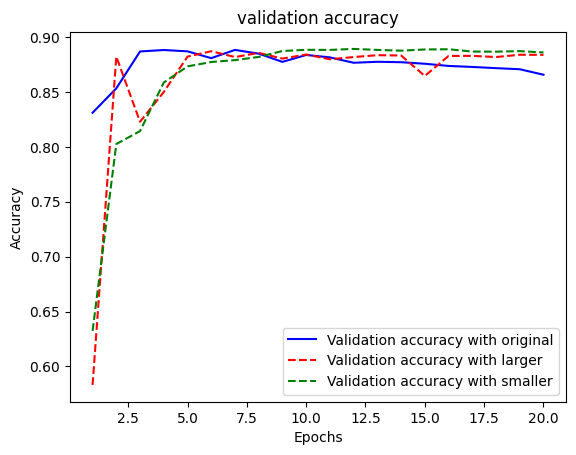

In [ ]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_larger = history_larger_model.history["val_accuracy"]
val_acc_smaller = history_smaller_model.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_larger, "r--",
         label="Validation accuracy with larger")
plt.plot(epochs, val_acc_smaller, "g--",
         label="Validation accuracy with smaller")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# - Some questions
# - Visualize validation loss of the original model, model with lower capacity and model
#   with larger capacity

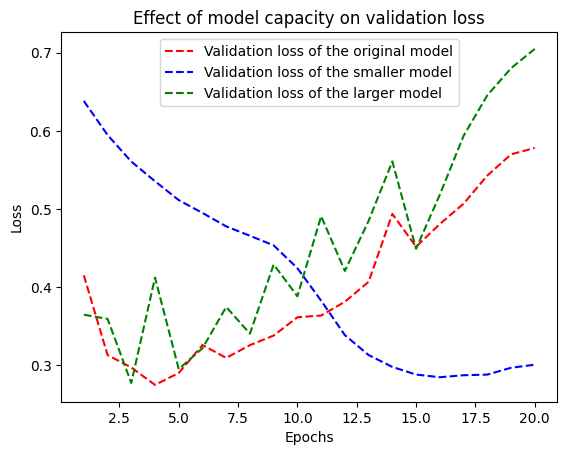

In [14]:
import matplotlib.pyplot as plt
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history['val_loss']
val_loss_original = history_original.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "r--",
         label="Validation loss of the original model")
plt.plot(epochs, val_loss_smaller, "b--",
         label="Validation loss of the smaller model")
plt.plot(epochs, val_loss_larger, "g--",
         label="Validation loss of the larger model")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5907 - accuracy: 0.7898 - val_loss: 0.4634 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4005 - accuracy: 0.8920 - val_loss: 0.3872 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3287 - accuracy: 0.9145 - val_loss: 0.3727 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2958 - accuracy: 0.9232 - val_loss: 0.3986 - val_accuracy: 0.8664
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2717 - accuracy: 0.9337 - val_loss: 0.3531 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2578 - accuracy: 0.9392 - val_loss: 0.3578 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2454 - accuracy: 0.9453 - val_loss: 0.3613 - val_accuracy: 0.8844
Epoch 8/20
30

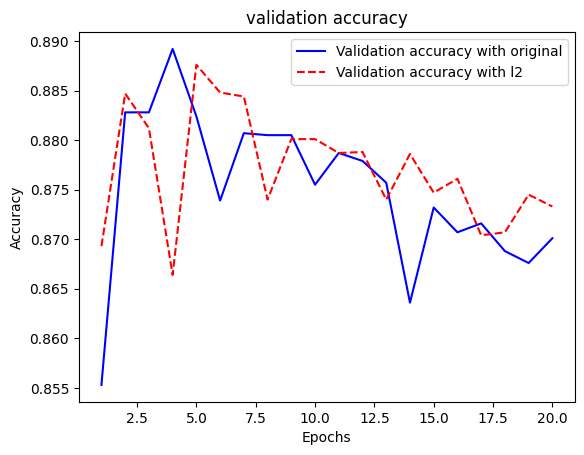

In [16]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_l2 = history_l2_reg.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_l2, "r--",
         label="Validation accuracy with l2")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**Different weight regularizers available in Keras**

In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6365 - accuracy: 0.6247 - val_loss: 0.5079 - val_accuracy: 0.8525
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5091 - accuracy: 0.7577 - val_loss: 0.4052 - val_accuracy: 0.8591
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4273 - accuracy: 0.8186 - val_loss: 0.3484 - val_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3704 - accuracy: 0.8567 - val_loss: 0.3096 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3212 - accuracy: 0.8839 - val_loss: 0.2849 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2870 - accuracy: 0.9004 - val_loss: 0.2840 - val_accuracy: 0.8900
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2557 - accuracy: 0.9143 - val_loss: 0.2803 - val_accuracy: 0.8890
Epoch 8/20
30

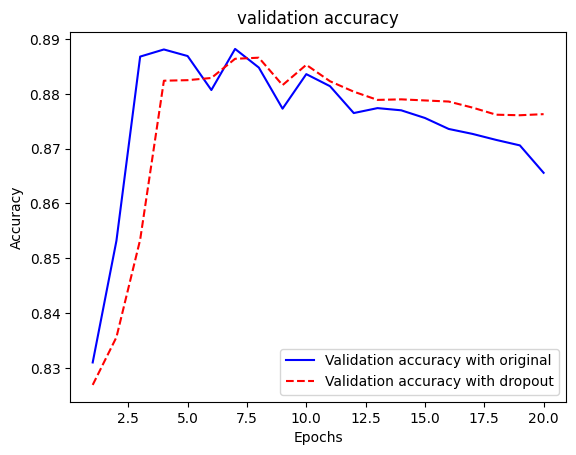

In [ ]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_dropout = history_dropout.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_dropout, "r--",
         label="Validation accuracy with dropout")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# - Some questions
# - Visualize validation loss of the original model and model with dropout

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

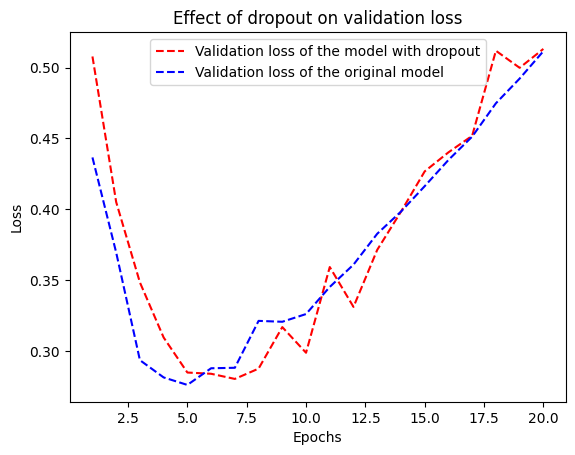

In [20]:
import matplotlib.pyplot as plt
val_loss_dropout = history_dropout.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout, "r--",
         label="Validation loss of the model with dropout")
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of the original model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary